In [2]:
# combine p7 with p11
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx
import pandas as pd
import numpy as np

In [23]:
# import total traffic over all the provinces
# tf stands for total traffic
tf = pd.read_csv('평일전국총교통량.csv',encoding='utf-8')
tf.head()

,Unnamed: 0,0
0,강원도,87857
1,경기도,473501
2,경상남도,351389
3,경상북도,340267
4,광주광역시,98774


In [24]:
tf = tf.rename(columns={'Unnamed: 0':'name','0':'totalTraffic'})
tf

,name,totalTraffic
0,강원도,87857
1,경기도,473501
2,경상남도,351389
3,경상북도,340267
4,광주광역시,98774
5,대구광역시,306643
6,대전광역시,182120
7,부산광역시,286123
8,세종특별자치시,31942
9,울산광역시,110015


In [25]:
# 경기도 seems to consist of 경기도, 인천광역시, and 서울특별시
# change its name to avoid misunderstanding
tf['name'][1] = '경인·서울'
tf.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_20964\4064781189.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tf['name'][1] = '경인·서울'
C:\Users\syj43\AppData\Local\Temp\ipykernel_20964\4064781189.py:3: SettingWithCopyWarning: 
A value is t

,name,totalTraffic
0,강원도,87857
1,경인·서울,473501
2,경상남도,351389
3,경상북도,340267
4,광주광역시,98774


In [26]:
tf_sorted = tf.sort_values('totalTraffic', ascending=False)
tf_sorted = tf_sorted.reset_index(drop=True)

In [27]:
tf_sorted['trafficScaled'] = tf_sorted['totalTraffic'].apply(lambda x:int(x/10000))
tf_sorted

,name,totalTraffic,trafficScaled
0,경인·서울,473501,47
1,경상남도,351389,35
2,경상북도,340267,34
3,충청남도,330467,33
4,대구광역시,306643,30
5,부산광역시,286123,28
6,충청북도,244406,24
7,전라남도,182358,18
8,대전광역시,182120,18
9,전라북도,133590,13


In [28]:
# font
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
fm.fontManager.addfont('BinggraeII.ttf')
mpl.rcParams["font.family"] = 'Binggrae?'

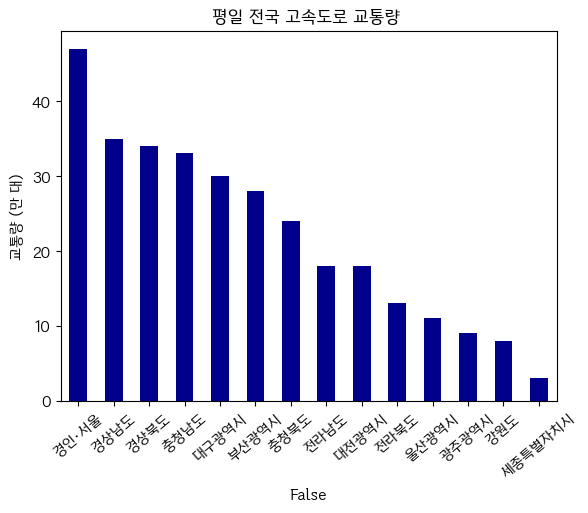

In [83]:
# bar plot for traffic ranking
tf_sorted.plot(x='name', y='trafficScaled', kind='bar',title='평일 전국 고속도로 교통량 ', xlabel=False, ylabel='교통량 (만 대)',legend=False,
              rot=40, color='darkblue')
plt.show()

In [92]:
tf.to_csv('평일전국통행량수정.csv',encoding='utf-8')

In [8]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('BinggraeII.ttf')

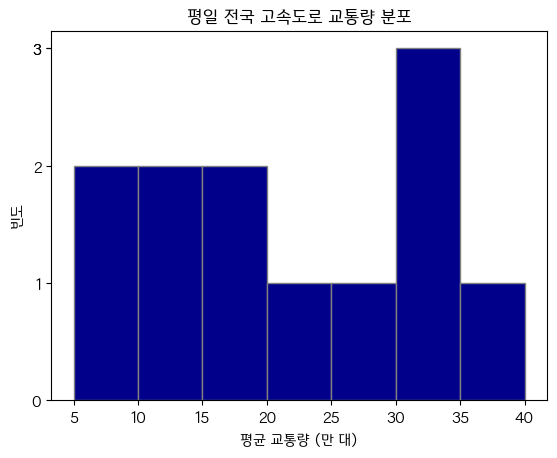

In [22]:
plt.hist(tf['totalTraffic'].values/10000, color='darkblue',edgecolor='gray', bins=list(range(5,45,5))) 
plt.xlabel('평균 교통량 (만 대)')
plt.ylabel('빈도')
plt.yticks([0, 1, 2, 3, 3])
plt.title('평일 전국 고속도로 교통량 분포')
plt.show() # ~ normalized

In [96]:
tf['totalTraffic']/10000

0      8.7857
1     47.3501
2     35.1389
3     34.0267
4      9.8774
5     30.6643
6     18.2120
7     28.6123
8      3.1942
9     11.0015
10    18.2358
11    13.3590
12    33.0467
13    24.4406
Name: totalTraffic, dtype: float64

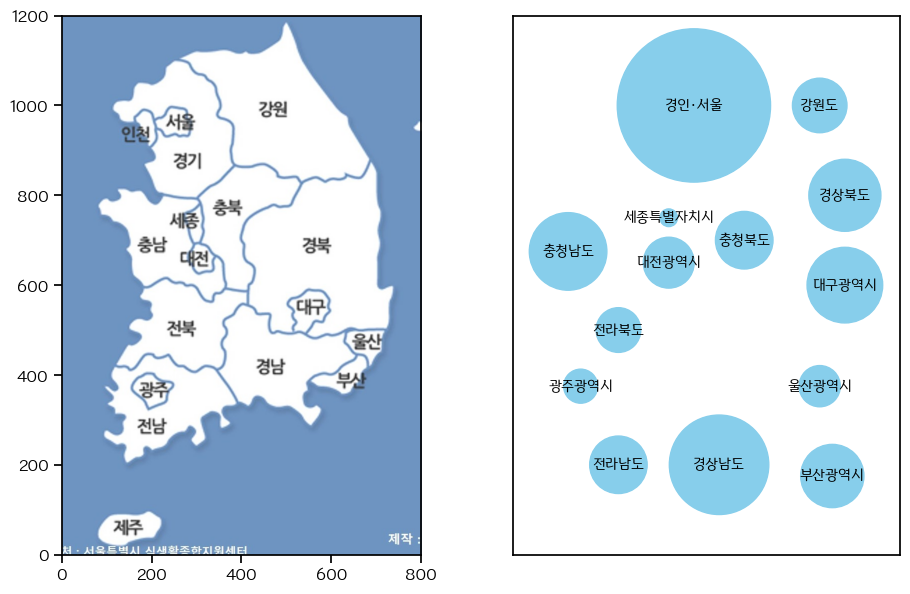

In [21]:
# custom node position, refering to Korean map
# plot the map and the graph in a row
fig, ax = plt.subplots(1,2,sharex='col',sharey='row',figsize=(11,7))
imgBg = plt.imread('전국지도수정.jpg')
ax[0].imshow(imgBg, extent=[0, 800, 0, 1200])

# network
G = nx.Graph()
G.add_nodes_from(tf['name'])
# adjust nodes' position
pos = {'경인·서울':(300,1000),'경상남도':(350,200),'충청남도':(50,675),'충청북도':(400,700),'대전광역시':(250,650),
       '울산광역시':(550,375),'부산광역시':(575,175),'전라북도':(150,500),'전라남도':(150,200),'강원도':(550,1000),
       '광주광역시':(75,375),'세종특별자치시':(250,750),'경상북도':(600,800),'대구광역시':(600,600)}
nx.draw_networkx(G, with_labels=True, ax=ax[1], pos=pos, font_size=10, node_size=tf['totalTraffic']/100, node_color='skyblue', font_family='Binggrae?')
plt.margins(0.2,0.1)
plt.show()

# fig.savefig('경상남도노드.png')

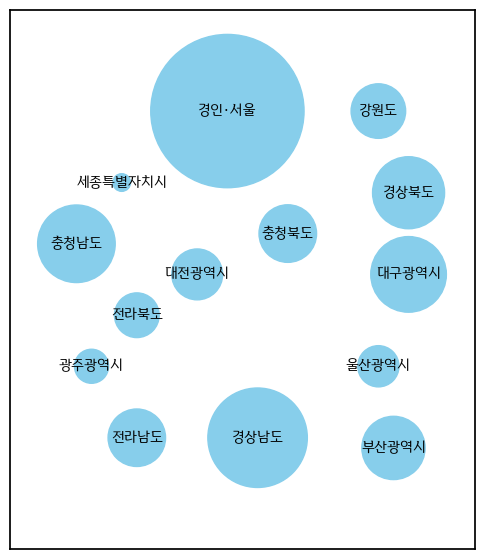

In [16]:
# network
fig, ax = plt.subplots(1,1,figsize=(6,7))
G = nx.Graph()
G.add_nodes_from(tf['name'])
# adjust nodes' position
pos = {'경인·서울':(300,1000),'경상남도':(350,200),'충청남도':(50,675),'충청북도':(400,700),'대전광역시':(250,600),
       '울산광역시':(550,375),'부산광역시':(575,175),'전라북도':(150,500),'전라남도':(150,200),'강원도':(550,1000),
       '광주광역시':(75,375),'세종특별자치시':(125,825),'경상북도':(600,800),'대구광역시':(600,600)}
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, font_size=10, node_size=tf['totalTraffic']/100, node_color='skyblue', font_family='Binggrae?')
plt.margins(0.2,0.3)
plt.show()

In [63]:
# import velocity data
vel = pd.read_csv('평일노드간통행속도.csv',encoding='utf-8')
vel.head()

,출발노드주소,도착노드주소,평균속도
0,부산광역시,부산광역시,73
1,부산광역시,부산광역시,86
2,부산광역시,경상남도,92
3,경상남도,경상남도,87
4,경상남도,울산광역시,90


In [125]:
vel['출발노드주소'].unique()

array(['부산광역시', '경상남도', '울산광역시', '경상북도', '대구광역시', '충청북도', '대전광역시', '충청남도',
       '경기도', '서울특별시', '전라북도', '전라남도', '대전광역시\xa0', '광주광역시', '세종특별자치시',
       '인천광역시', '강원도', nan], dtype=object)

In [64]:
# mismatch between the two datasets! 
# whereas in the former 경기도 encompasses its neighboring provinces, it does not in the latter
# correct the typo '대전광역시\xa0' and deal with nan first
vel['출발노드주소'] = vel['출발노드주소'].apply(lambda x: '대전광역시' if x=='대전광역시\xa0' else x)
vel['도착노드주소'] = vel['도착노드주소'].apply(lambda x: '대전광역시' if x=='대전광역시\xa0' else x)
vel = vel.dropna()

In [127]:
vel['출발노드주소'].unique()

array(['부산광역시', '경상남도', '울산광역시', '경상북도', '대구광역시', '충청북도', '대전광역시', '충청남도',
       '경기도', '서울특별시', '전라북도', '전라남도', '광주광역시', '세종특별자치시', '인천광역시', '강원도'],
      dtype=object)

In [134]:
len(vel['출발노드주소'].unique())

16

In [90]:
print(vel['출발노드주소'][0])
print(vel['도착노드주소'][0])
print(vel['출발노드주소'][0]==vel['도착노드주소'][0])

부산광역시
부산광역시
True


In [65]:
# drop rows whose 출발노드주소 is equal to 도착노드주소
dropIdx = vel[vel['출발노드주소']==vel['도착노드주소']].index
dropIdx[:5]

Index([0, 1, 3, 5, 6], dtype='int64')

In [66]:
vel = vel.drop(dropIdx)
vel.head()

,출발노드주소,도착노드주소,평균속도
2,부산광역시,경상남도,92
4,경상남도,울산광역시,90
8,울산광역시,경상북도,103
13,경상북도,대구광역시,92
19,대구광역시,경상북도,106


In [68]:
vel = vel.reset_index()
vel.head()

,index,출발노드주소,도착노드주소,평균속도
0,2,부산광역시,경상남도,92
1,4,경상남도,울산광역시,90
2,8,울산광역시,경상북도,103
3,13,경상북도,대구광역시,92
4,19,대구광역시,경상북도,106


In [69]:
vel = vel.drop('index',axis=1)
vel.head()

,출발노드주소,도착노드주소,평균속도
0,부산광역시,경상남도,92
1,경상남도,울산광역시,90
2,울산광역시,경상북도,103
3,경상북도,대구광역시,92
4,대구광역시,경상북도,106


In [135]:
# take average with respect to start- and end nodes
groupVel = vel.groupby(['출발노드주소','도착노드주소']).median()
groupVel

평균속도
출발노드주소 도착노드주소       
강원도    경기도     101.0
       충청북도     92.0
경기도    강원도     100.0
       경상남도     97.0
       광주광역시    93.5
...              ...
충청북도   강원도     104.0
       경기도      92.0
       경상북도     96.5
       대전광역시    96.5
       충청남도     93.0

[66 rows x 1 columns]

In [136]:
groupVel.to_csv('노드간통행속도집계.csv',encoding='utf-8')

In [143]:
groupVel = pd.read_csv('노드간통행속도집계.csv',encoding='utf-8')
groupVel.head()

,출발노드주소,도착노드주소,평균속도
0,강원도,경기도,101.0
1,강원도,충청북도,92.0
2,경기도,강원도,100.0
3,경기도,경상남도,97.0
4,경기도,광주광역시,93.5


In [145]:
# drop rows containing either 서울특별시 or 경기도
dropIdx = groupVel[(groupVel['출발노드주소']=='서울특별시')|(groupVel['도착노드주소']=='서울특별시')|
                    (groupVel['출발노드주소']=='인천광역시')|(groupVel['도착노드주소']=='인천광역시')].index
groupVel = groupVel.drop(dropIdx)
groupVel['출발노드주소'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '세종특별자치시', '울산광역시', '전라남도', '전라북도', '충청남도', '충청북도'], dtype=object)

In [148]:
groupVel = pd.read_excel('노드간통행속도집계_reduced.xlsx')
groupVel.head()

,출발노드주소,도착노드주소,평균속도
0,강원도,충청북도,92.0
1,경기도,강원도,100.0
2,경기도,경상남도,97.0
3,경기도,광주광역시,93.5
4,경기도,대전광역시,100.0


In [150]:
# map '경기도' to '경인·서울'
groupVel['출발노드주소'] = groupVel['출발노드주소'].apply(lambda x: '경인·서울' if x=='경기도' else x)
groupVel['도착노드주소'] = groupVel['도착노드주소'].apply(lambda x: '경인·서울' if x=='경기도' else x)
groupVel.head()

,출발노드주소,도착노드주소,평균속도
0,강원도,충청북도,92.0
1,경인·서울,강원도,100.0
2,경인·서울,경상남도,97.0
3,경인·서울,광주광역시,93.5
4,경인·서울,대전광역시,100.0


In [176]:
groupVel['출발노드주소'].values

array(['강원도', '경인·서울', '경인·서울', '경인·서울', '경인·서울', '경인·서울', '경인·서울',
       '경인·서울', '경인·서울', '경상남도', '경상남도', '경상남도', '경상남도', '경상남도', '경상남도',
       '경상남도', '경상북도', '경상북도', '경상북도', '경상북도', '광주광역시', '광주광역시', '대전광역시',
       '대전광역시', '대전광역시', '대전광역시', '부산광역시', '전라남도', '전라북도', '충청남도', '충청남도'],
      dtype=object)

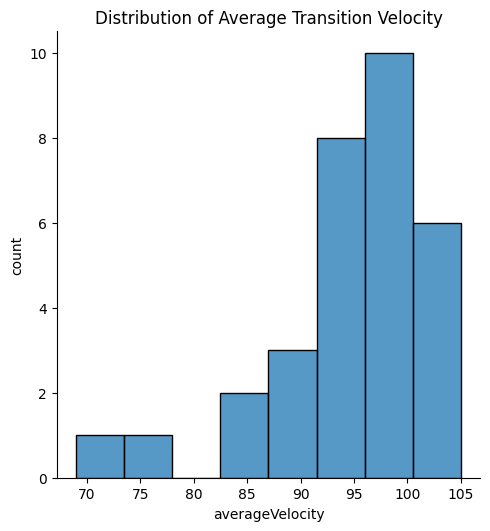

In [212]:
sns.displot(groupVel['평균속도'].values) 
plt.xlabel('averageVelocity')
plt.ylabel('count')
plt.title('Distribution of Average Transition Velocity')
plt.show() # ~ normalized

In [203]:
edgeList = zip(groupVel['출발노드주소'].values,groupVel['도착노드주소'].values)

In [204]:
list(edgeList)

[('강원도', '충청북도'),
 ('경인·서울', '강원도'),
 ('경인·서울', '경상남도'),
 ('경인·서울', '광주광역시'),
 ('경인·서울', '대전광역시'),
 ('경인·서울', '전라남도'),
 ('경인·서울', '전라북도'),
 ('경인·서울', '충청남도'),
 ('경인·서울', '충청북도'),
 ('경상남도', '강원도'),
 ('경상남도', '경상북도'),
 ('경상남도', '대구광역시'),
 ('경상남도', '부산광역시'),
 ('경상남도', '울산광역시'),
 ('경상남도', '전라남도'),
 ('경상남도', '전라북도'),
 ('경상북도', '대구광역시'),
 ('경상북도', '대전광역시'),
 ('경상북도', '울산광역시'),
 ('경상북도', '충청북도'),
 ('광주광역시', '대전광역시'),
 ('광주광역시', '전라남도'),
 ('대전광역시', '세종특별자치시'),
 ('대전광역시', '전라남도'),
 ('대전광역시', '충청남도'),
 ('대전광역시', '충청북도'),
 ('부산광역시', '울산광역시'),
 ('전라남도', '전라북도'),
 ('전라북도', '충청남도'),
 ('충청남도', '세종특별자치시'),
 ('충청남도', '충청북도')]

In [196]:
groupVel['평균속도'].values

array([ 92. , 100. ,  97. ,  93.5, 100. , 105. ,  85. ,  91.5,  95. ,
        84. , 100.5,  96. ,  90. ,  91. ,  92. , 104. , 100.5,  69. ,
        95. ,  97. ,  77. ,  91. ,  92. ,  98. ,  93. ,  96. ,  99. ,
       103. ,  99. , 103. ,  99. ])

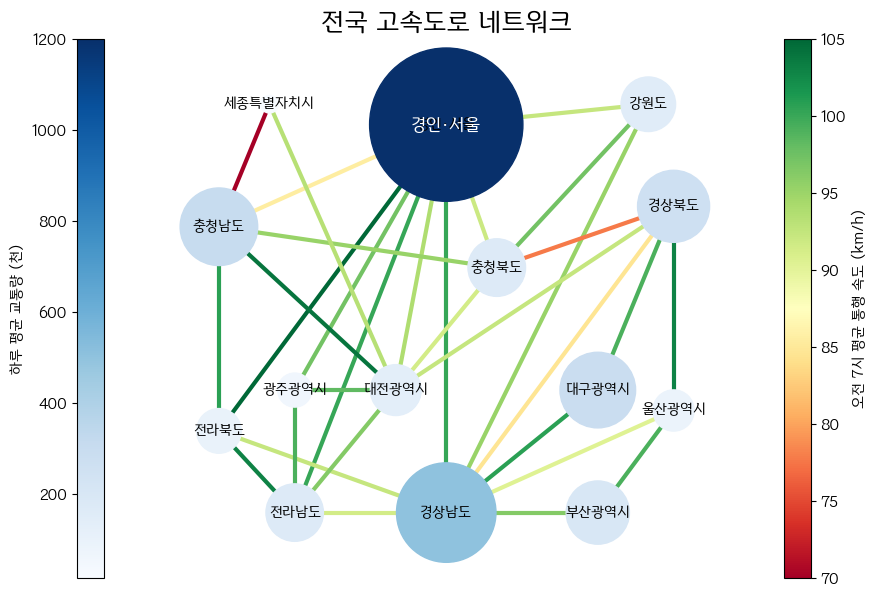

In [344]:
# draw network
fig, ax = plt.subplots(1,1,figsize=(11,7))
mpl.rcParams["font.family"] = 'Binggrae?'
cmapTraffic = plt.cm.Blues
cmapVelocity = plt.cm.RdYlGn
# network
G = nx.Graph()
G.add_nodes_from(tf['name'])
G.add_edges_from([('강원도', '충청북도'),
 ('경인·서울', '강원도'),
 ('경인·서울', '경상남도'),
 ('경인·서울', '광주광역시'),
 ('경인·서울', '대전광역시'),
 ('경인·서울', '전라남도'),
 ('경인·서울', '전라북도'),
 ('경인·서울', '충청남도'),
 ('경인·서울', '충청북도'),
 ('경상남도', '강원도'),
 ('경상남도', '경상북도'),
 ('경상남도', '대구광역시'),
 ('경상남도', '부산광역시'),
 ('경상남도', '울산광역시'),
 ('경상남도', '전라남도'),
 ('경상남도', '전라북도'),
 ('경상북도', '대구광역시'),
 ('경상북도', '대전광역시'),
 ('경상북도', '울산광역시'),
 ('경상북도', '충청북도'),
 ('광주광역시', '대전광역시'),
 ('광주광역시', '전라남도'),
 ('대전광역시', '세종특별자치시'),
 ('대전광역시', '전라남도'),
 ('대전광역시', '충청남도'),
 ('대전광역시', '충청북도'),
 ('부산광역시', '울산광역시'),
 ('전라남도', '전라북도'),
 ('전라북도', '충청남도'),
 ('충청남도', '세종특별자치시'),
 ('충청남도', '충청북도')]
)
# adjust nodes' position
pos = {'경인·서울':(300,1050),'경상남도':(300,100),'충청남도':(-150,800),'충청북도':(400,700),'대전광역시':(200,400),
       '울산광역시':(750,350),'부산광역시':(600,100),'전라북도':(-150,300),'전라남도':(0,100),'강원도':(700,1100),
       '광주광역시':(0,400),'세종특별자치시':(-50,1100),'경상북도':(750,850),'대구광역시':(600,400)}
# pos = nx.circular_layout(G)
nx.draw_networkx(G, with_labels=True, pos=pos, ax=ax, font_size=10, node_size=tf['totalTraffic']/100, 
                 font_family='Binggrae?', edge_color=groupVel['평균속도'].values, width=3, edge_cmap=cmapVelocity,
                 node_color=tf['totalTraffic']/100, cmap=cmapTraffic)
# add color bars
norm = mpl.colors.Normalize(vmin=15, vmax=1200)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
             ax=ax, orientation='vertical', label='하루 평균 교통량 (천)', fraction=0.07, pad=0.05, location='left')
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# cax = inset_axes(ax, width="100%", height="6%", loc='lower left')
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlGnBu),
#              ax=ax, orientation='horizontal', label='하루 평균 교통량 (천)', cax=cax)

norm2 = mpl.colors.Normalize(vmin=70, vmax=105)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmapVelocity),
             ax=ax, orientation='vertical', label='오전 7시 평균 통행 속도 (km/h)')
# add textboxes
font = {"fontname": "Binggrae?", "color": "white", "fontsize": 12, "fontweight": "extra bold"}
ax.text(
    0.5,
    0.83,
    "경인·서울",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# remove the frame from the fig
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.title('전국 고속도로 네트워크', fontsize=18)
plt.margins(0.1,0.1)
plt.show()
fig.savefig('전국고속도로네트워크.png')

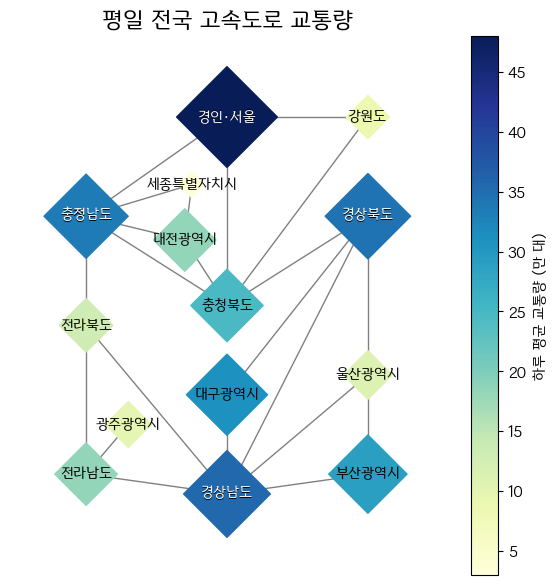

In [95]:
# draw nodes only
fig, ax = plt.subplots(1,1,figsize=(7,7))
mpl.rcParams["font.family"] = 'Binggrae?'
cmapTraffic = plt.cm.YlGnBu

# network
G = nx.Graph()
G.add_nodes_from(tf['name'])
# reflect real location
# pos = {'경인·서울':(250,950),'경상남도':(350,200),'충청남도':(150,650),'충청북도':(350,650),'대전광역시':(250,550),
#        '울산광역시':(550,350),'부산광역시':(550,150),'전라북도':(150,400),'전라남도':(150,150),'강원도':(450,900),
#        '광주광역시':(230,300),'세종특별자치시':(250,750),'경상북도':(550,650),'대구광역시':(450,475)}
pos = {'강원도':(600,950), '경인·서울':(300,950), '경상남도':(300,0), '경상북도':(600,700),
       '광주광역시':(90,175),'대구광역시':(300,250),'대전광역시':(210,640), '부산광역시':(600,50), 
       '세종특별자치시':(225,780),'울산광역시':(600,300), 
       '전라남도':(0,50), '전라북도':(0,425),'충청남도':(0,700),'충청북도':(300,475)}
G.add_edges_from([('강원도', '충청북도'),
 ('경인·서울', '강원도'),
 ('경인·서울', '충청남도'),
 ('경인·서울', '충청북도'),
 ('경상남도', '경상북도'),
 ('경상남도', '대구광역시'),
 ('경상남도', '부산광역시'),
 ('경상남도', '울산광역시'),
 ('경상남도', '전라남도'),
 ('경상남도', '전라북도'),
 ('경상북도', '대구광역시'),
 ('경상북도', '울산광역시'),
 ('경상북도', '충청북도'),
 ('광주광역시', '전라남도'),
 ('대전광역시', '세종특별자치시'),
 ('대전광역시', '충청남도'),
 ('대전광역시', '충청북도'),
 ('부산광역시', '울산광역시'),
 ('전라남도', '전라북도'),
 ('전라북도', '충청남도'),
 ('충청남도', '세종특별자치시'),
 ('충청남도', '충청북도')]
)
nx.draw_networkx(G, with_labels=True, pos=pos, ax=ax, font_size=10, node_size=tf['totalTraffic']/180, 
                 font_family='Binggrae?', node_color=tf['totalTraffic']/10000,cmap=cmapTraffic, node_shape='D', edge_color='gray')
# add color bars
norm = mpl.colors.Normalize(vmin=3, vmax=48)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
             ax=ax, orientation='vertical', label='하루 평균 교통량 (만 대)')

# add textboxes
font = {"fontname": "Binggrae?", "color": "white", "fontsize": 10, "fontweight": "extra bold"}
ax.text(
    0.5,
    0.84,
    "경인·서울",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.5,
    0.145,
    "경상남도",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.175,
    0.66,
    "충정남도",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.825,
    0.66,
    "경상북도",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
# remove the frame from the fig
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
plt.title('평일 전국 고속도로 교통량', fontsize=16)
plt.margins(0.2,0.15)
plt.show()

In [96]:
fig.savefig('평일전국고속도통행량22.png')